In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
data = pd.read_csv("data_clean.csv")
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [133]:
print(data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [135]:
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [137]:
data1 = data.drop(['Unnamed: 0',"Temp C"], axis =1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [139]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 10.0+ KB


In [141]:
#Convert the month column data type to float data type
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [143]:
data1[data1.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [145]:
data1[data1.duplicated(keep=False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [147]:
#Drop duplicates rows
data1.drop_duplicates(keep='first',inplace=True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [149]:
#Rename column names(Rename the column)
data1.rename({'Solar.R': 'Solar'}, axis=1, inplace = True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [151]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    119 non-null    float64
 1   Solar    150 non-null    float64
 2   Wind     157 non-null    float64
 3   Month    156 non-null    float64
 4   Day      157 non-null    int64  
 5   Year     157 non-null    int64  
 6   Temp     157 non-null    int64  
 7   Weather  154 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 11.0+ KB


In [153]:
#Display data1 missing values count in each column using isnull().sum()
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

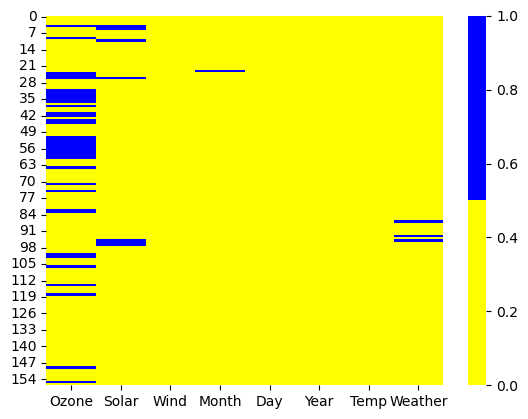

In [155]:
#Visualize data1 missing values using heat map
cols=data1.columns
colors=['yellow','blue']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)

In [156]:
#Imputation of missing value with median
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of ozone: ",median_ozone)
print("Mean of Ozone: ",mean_ozone)

Median of ozone:  31.0
Mean of Ozone:  41.81512605042017


In [159]:
#Replace the Ozone missing values with median values
data1['Ozone']=data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [161]:
#Replace the Solar missing values with median values
data1['Solar']=data1['Solar'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [163]:
#find the meanand median values of each numeric column
#Imputation of missing values with median
median_solar = data1["Solar"].median()
mean_solar = data1["Solar"].mean()
print("Median of Solar: ",median_solar)
print("Mean of Solar: ",mean_solar)

Median of Solar:  193.0
Mean of Solar:  178.48407643312103


In [165]:
#Replace the solar missing values with median values
data1["Solar"] = data1['Solar'].fillna(mean_solar)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [167]:
#Print the data1 5 rows
data1.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,31.0,31.0,14.3,5.0,5,2010,56,S


In [169]:
#Find the mode values of categorical column (Weather)
print(data1["Weather"].value_counts())
mode_weather=data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     58
C     49
PS    47
Name: count, dtype: int64
S


In [171]:
#Impute missing values (Replace NaN with mode etc.) using fillna()
data1["Weather"]=data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [173]:
#Impute the missing values (Replace NaN with mode etc.) of "month" using fillna()
mode_month=data1["Month"].mode()[0]
data1["Month"]=data1["Month"].fillna(mode_month)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [175]:
data1.tail()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,31.0,145.0,13.2,9.0,27,2010,77,S
157,18.0,131.0,8.0,9.0,29,2010,76,C


In [177]:
#Reset the index column
data1.reset_index(drop=True)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,31.0,31.0,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,31.0,145.0,13.2,9.0,27,2010,77,S


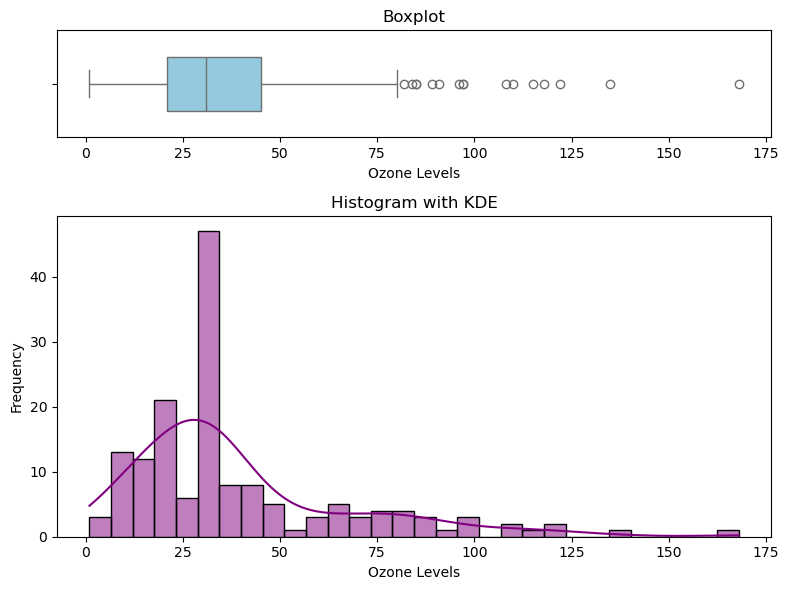

In [179]:
#Detection of outliers
#Create a figure with two subplots, stacked vertically
fig, axes = plt.subplots (2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

#Plot the boxplot in the first (top) subplot 
sns.boxplot(data=data1 ["Ozone"], ax=axes[0], color='skyblue', width=0.5, orient='h') 
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")

# Plot the histogram with KDE curve in the second (bottom) subplot 
sns.histplot(data1 ["Ozone"], kde=True, ax=axes [1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

#Adjust Layout for better spacing 
plt.tight_layout()

# Show the plot 
plt.show()

In [182]:
#Observations
*The ozone column has extreme values beyond 81 as seen from box plot
*The same is confirmed from the below right=skewed histogram

SyntaxError: invalid syntax (3444910397.py, line 2)

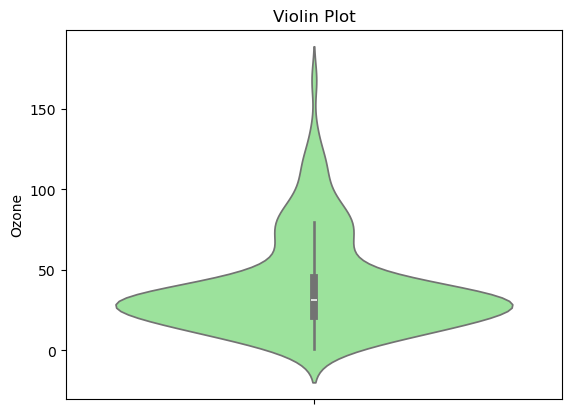

In [184]:
#Create a figure with two subplots,stacked vertically
sns.violinplot(data=data1["Ozone"],color='lightgreen')
plt.title("Violin Plot")

#Show the plot
plt.show()

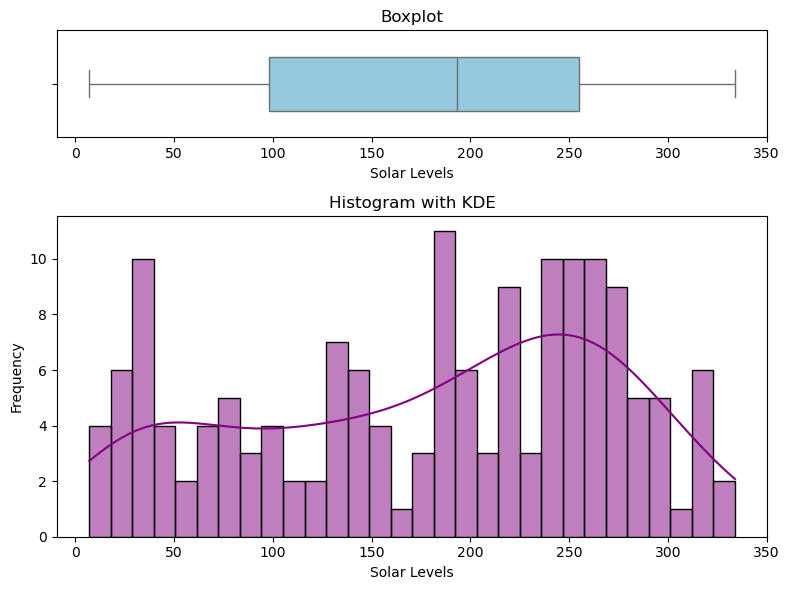

In [186]:
#Detection of outliers
#Create a figure with two subplots, stacked vertically
fig, axes = plt.subplots (2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

#Plot the boxplot in the first (top) subplot 
sns.boxplot(data=data1 ["Solar"], ax=axes[0], color='skyblue', width=0.5, orient='h') 
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Solar Levels")

# Plot the histogram with KDE curve in the second (bottom) subplot 
sns.histplot(data1 ["Solar"], kde=True, ax=axes [1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Solar Levels")
axes[1].set_ylabel("Frequency")

#Adjust Layout for better spacing 
plt.tight_layout()

# Show the plot 
plt.show()

In [187]:
#Obsevations
*It is not a symmetric distribution lightly skewed
*No outliers
*slightly left skewed

SyntaxError: invalid syntax (2986938704.py, line 2)

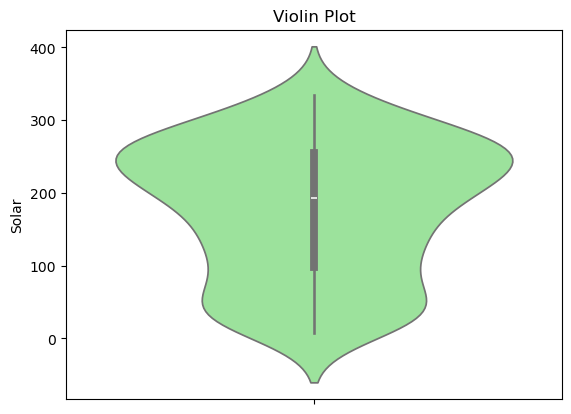

In [189]:
#Create a figure with two subplots,stacked vertically
sns.violinplot(data=data1["Solar"],color='lightgreen')
plt.title("Violin Plot")

#Show the plot
plt.show()

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

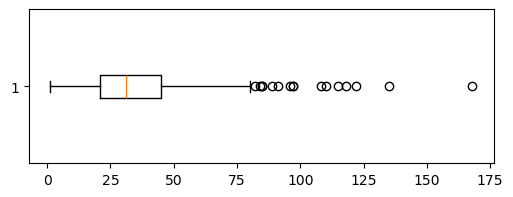

In [191]:
#Extract outliers from boxplot for Ozone column
plt.figure(figsize=(6,2))
boxplot_data = plt.boxplot(data1["Ozone"],vert=False)
[item.get_xdata() for item in boxplot_data ['fliers']]#fliers are outliers#Method-2

#Method-2
*Using mu +/-3 * Sigma limits

In [194]:
data1["Ozone"].describe()

count    157.000000
mean      39.197452
std       28.781992
min        1.000000
25%       21.000000
50%       31.000000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [196]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]
for x in data1["Ozone"]:
    if ((x < (mu - 3*sigma)) or ( x > (mu + 3*sigma))):
        print(x)

135.0
168.0


C:\Users\bachu\AppData\Local\Temp\ipykernel_16188\953247556.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = data1["Ozone"].describe()[1]
C:\Users\bachu\AppData\Local\Temp\ipykernel_16188\953247556.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = data1["Ozone"].describe()[2]


Quantile-Quantile plot for detection of outliers

Text(0.5, 0, 'Therotical Quantiles')

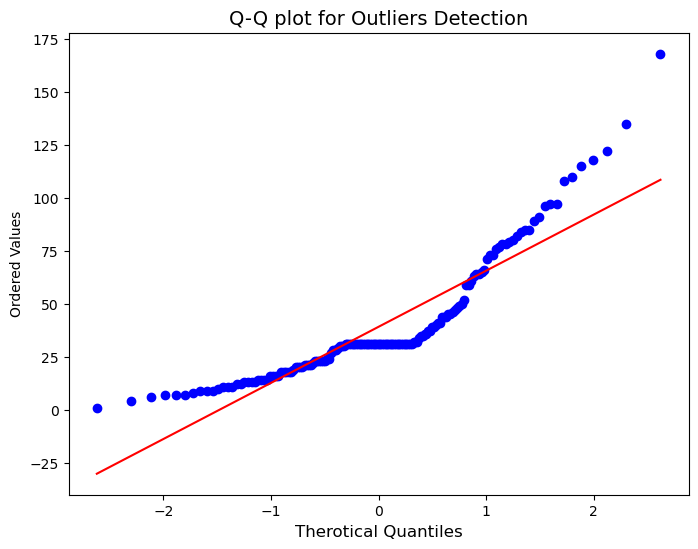

In [199]:
import scipy.stats as stats
#Create Q-Q plot
plt.figure(figsize=(8,6))
stats.probplot(data1["Ozone"],dist="norm",plot=plt)
plt.title("Q-Q plot for Outliers Detection",fontsize=14)
plt.xlabel("Therotical Quantiles",fontsize=12)

Text(0.5, 0, 'Therotical Quantiles')

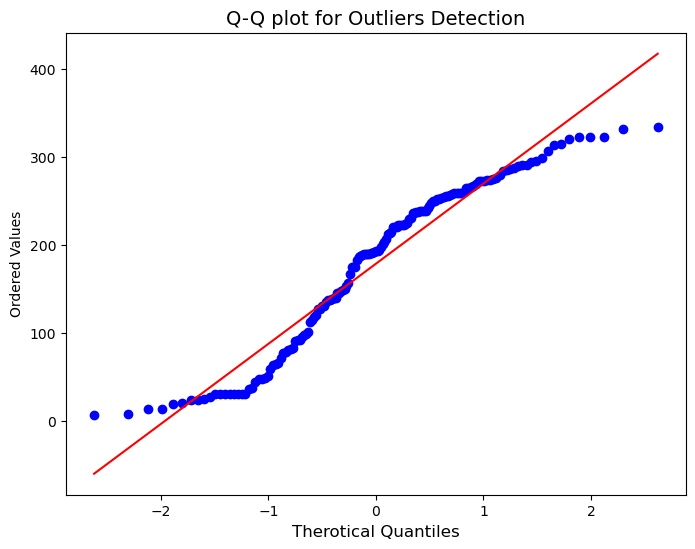

In [201]:
import scipy.stats as stats
#Create Q-Q plot
plt.figure(figsize=(8,6))
stats.probplot(data1["Solar"],dist="norm",plot=plt)
plt.title("Q-Q plot for Outliers Detection",fontsize=14)
plt.xlabel("Therotical Quantiles",fontsize=12)

Observations from Q-Q Plot
* The data does not followed normal distribution as the data points are deviating significantly away from the red line
* the data shows a right-skewed distribution and possible outliers

Other visualisations that could help in the detection of outliers

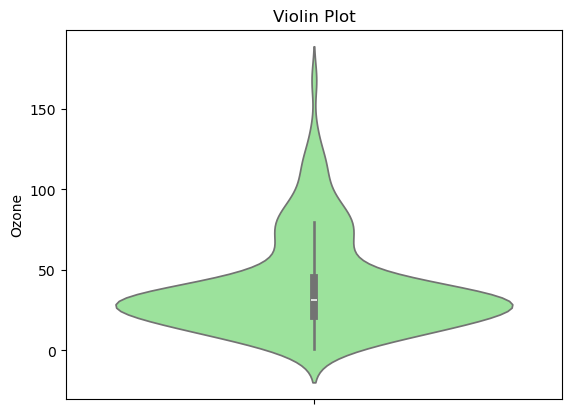

In [205]:
sns.violinplot(data=data1["Ozone"],color='lightgreen')
plt.title("Violin Plot")
plt.show()

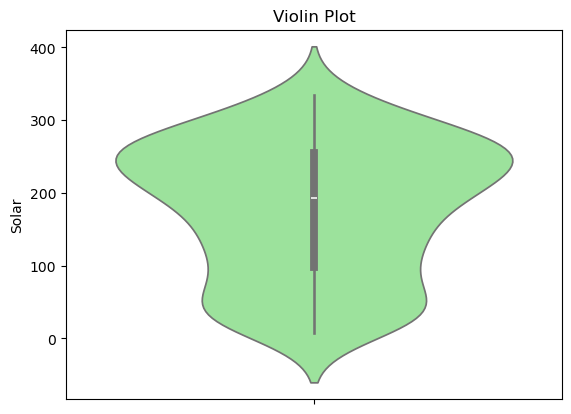

In [207]:
sns.violinplot(data=data1["Solar"],color='lightgreen')
plt.title("Violin Plot")
plt.show()

C:\Users\bachu\AppData\Local\Temp\ipykernel_16188\1672496530.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data1 ,x = "Weather", y = "Ozone",palette="Set2")


<Axes: xlabel='Weather', ylabel='Ozone'>

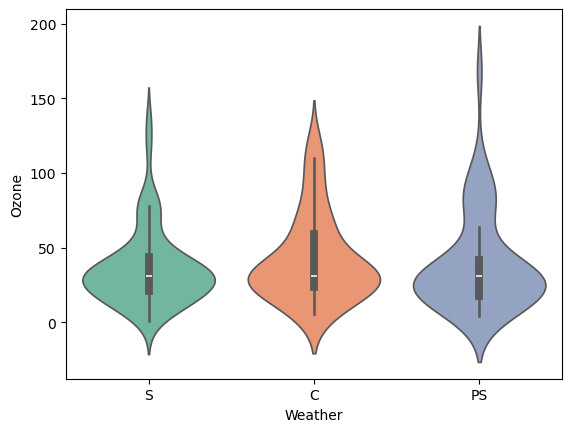

In [209]:
sns.violinplot(data=data1 ,x = "Weather", y = "Ozone",palette="Set2")

C:\Users\bachu\AppData\Local\Temp\ipykernel_16188\1439617633.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data1 ,x = "Solar", y = "Ozone",palette="Set2")


<Axes: xlabel='Solar', ylabel='Ozone'>

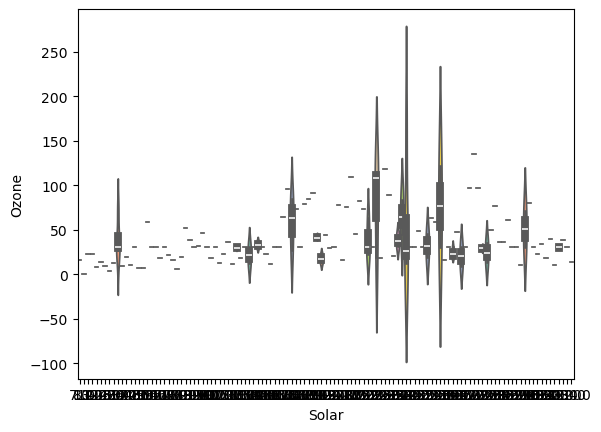

In [211]:
sns.violinplot(data=data1 ,x = "Solar", y = "Ozone",palette="Set2")

C:\Users\bachu\AppData\Local\Temp\ipykernel_16188\4294258553.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1 ,x="Weather",y="Ozone",color="orange",palette="Set2",size=6)


<Axes: xlabel='Weather', ylabel='Ozone'>

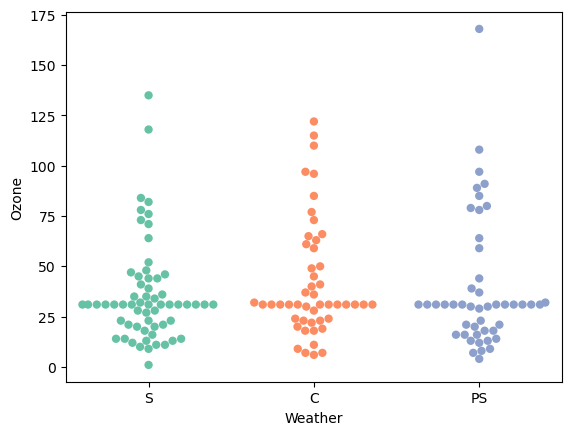

In [212]:
sns.swarmplot(data=data1 ,x="Weather",y="Ozone",color="orange",palette="Set2",size=6)

C:\Users\bachu\AppData\Local\Temp\ipykernel_16188\1963405507.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1 ,x="Weather",y="Solar",color="orange",palette="Set2",size=6)


<Axes: xlabel='Weather', ylabel='Solar'>

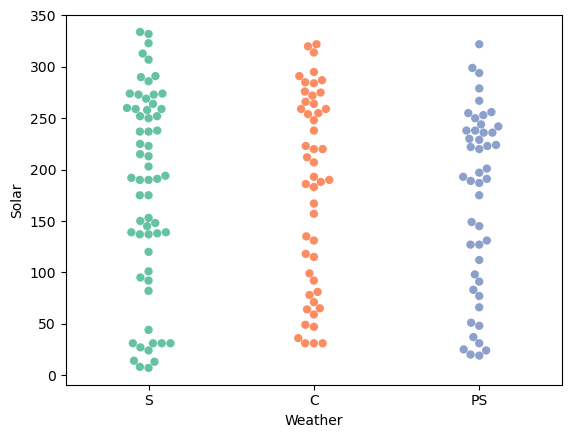

In [213]:
sns.swarmplot(data=data1 ,x="Weather",y="Solar",color="orange",palette="Set2",size=6)

C:\Users\bachu\AppData\Local\Temp\ipykernel_16188\161757952.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1 ,x="Solar",y="Ozone",color="orange",palette="Set2",size=6)
C:\Users\bachu\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bachu\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bachu\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

<Axes: xlabel='Solar', ylabel='Ozone'>

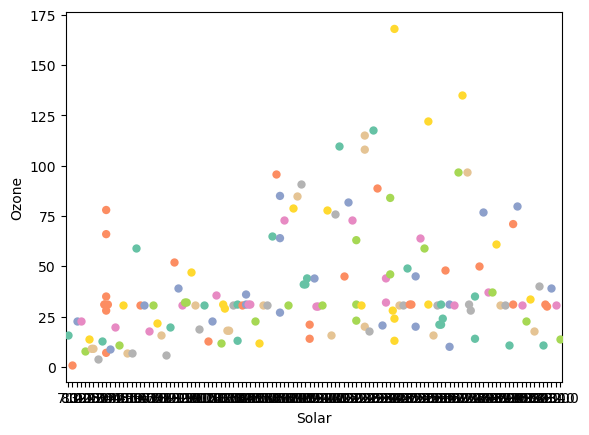

In [214]:
sns.swarmplot(data=data1 ,x="Solar",y="Ozone",color="orange",palette="Set2",size=6)

C:\Users\bachu\AppData\Local\Temp\ipykernel_16188\2725151952.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data1 ,x="Weather",y="Ozone",color="orange",palette="Set1",size=6,jitter=True)


<Axes: xlabel='Weather', ylabel='Ozone'>

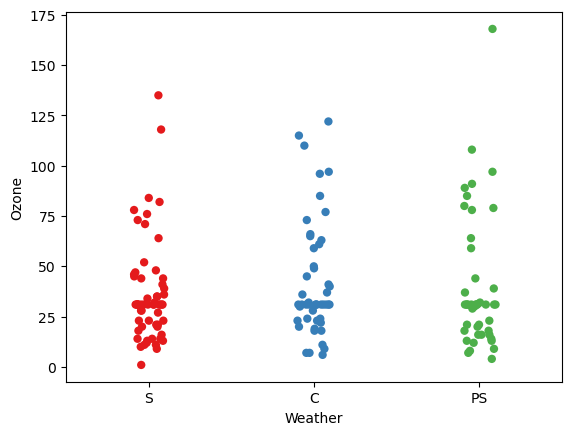

In [215]:
sns.stripplot(data=data1 ,x="Weather",y="Ozone",color="orange",palette="Set1",size=6,jitter=True)

<Axes: xlabel='Ozone', ylabel='Density'>

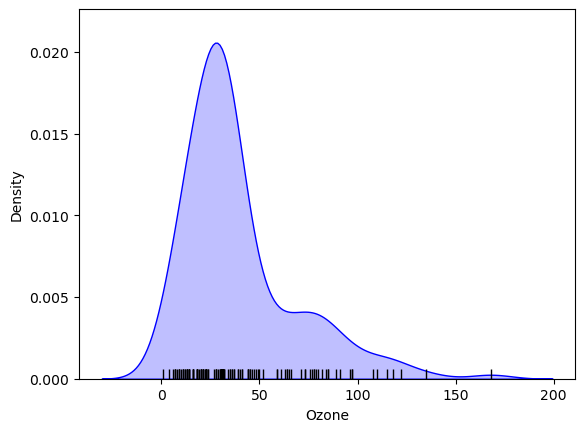

In [216]:
sns.kdeplot(data=data1["Ozone"],fill=True,color="blue")
sns.rugplot(data=data1["Ozone"],color="black")

<Axes: xlabel='Solar', ylabel='Density'>

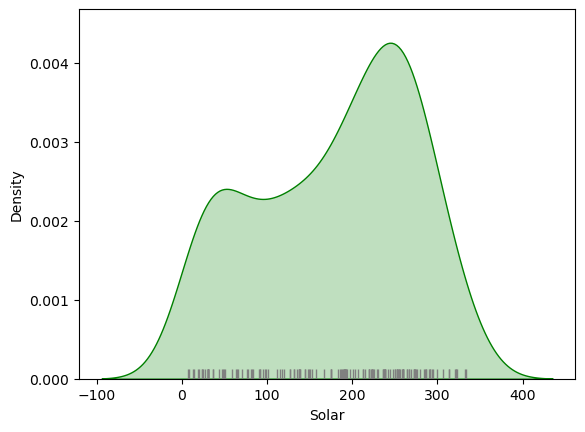

In [230]:
sns.kdeplot(data=data1["Solar"],fill=True,color="green")
sns.rugplot(data=data1["Solar"],color="grey")

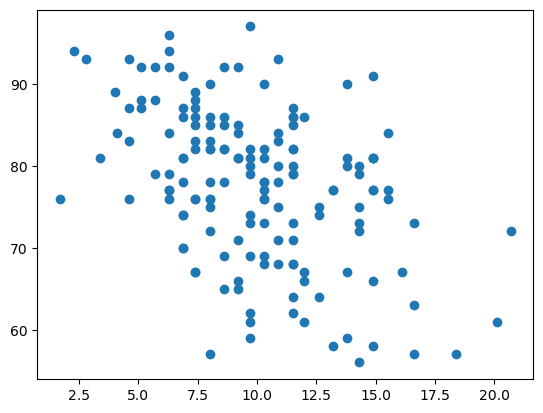

In [234]:
plt.scatter(data1["Wind"],data1["Temp"])

Correlation coefficient and pair plots

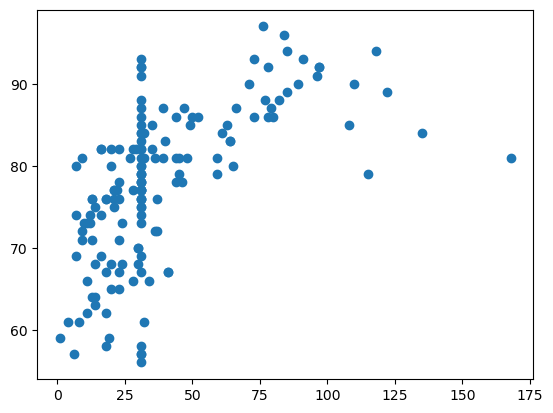

In [236]:
plt.scatter(data1["Ozone"],data1["Temp"])

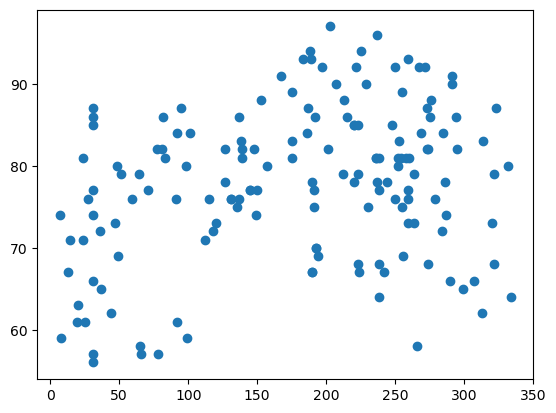

In [238]:
plt.scatter(data1["Solar"],data1["Temp"])

In [241]:
#Compute pearson correlation coefficient
#between Wind Speed and Temperature
data1["Wind"].corr(data1["Temp"])

-0.44122806925588215